In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [2]:
data = pd.read_csv("dataset1.csv") #reading the csv files using pandas

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum().head

<bound method NDFrame.head of label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64>

In [6]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [23]:
len(data)

42000

In [3]:
y = data['label']
X = data.drop(columns='label')
X=pd.DataFrame(X)

In [34]:
len(y)

42000

In [53]:
x_np =X.to_numpy()

In [48]:
data_np.shape

(42000, 785)

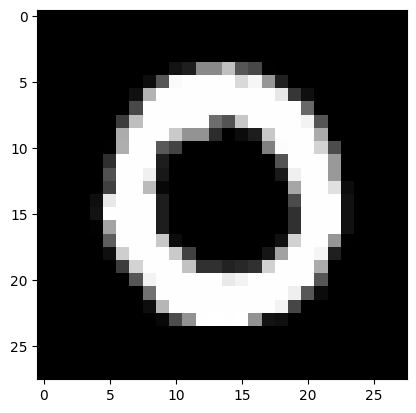

In [56]:
plt.imshow(x_np[1].reshape(28,28),cmap ='gray')

In [14]:
X_downsampled=resample(
    X,
    replace=False,
    n_samples=10000,
    random_state=42)

In [20]:
X_downsampled.shape

(10000, 784)

In [18]:
y_downsampled=resample(
    y,
    replace=False,
    n_samples=10000,
    random_state=42)

In [19]:
y_downsampled.shape

(10000,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_downsampled,y_downsampled,random_state=40)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_minmaxcale = scaler.fit_transform(X_train)
X_test_minmaxcale = scaler.fit_transform(X_test)
X_scaled_train = scale(X_train_minmaxcale)
X_scaled_test = scale(X_test_minmaxcale)
X_scaled_train =pd.DataFrame(X_scaled_train)
X_scaled_test=pd.DataFrame(X_scaled_test)

In [24]:
X_scaled_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,...,7.500000e+03,7.500000e+03,7.500000e+03,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.000208e-18,-9.473903e-19,-1.421085e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000067e+00,1.000067e+00,1.000067e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.470053e-02,-2.205782e-02,-1.633211e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.802680e+01,5.046613e+01,6.122908e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0


train accuracy:  1.0 

test accuracy: 0.9096 



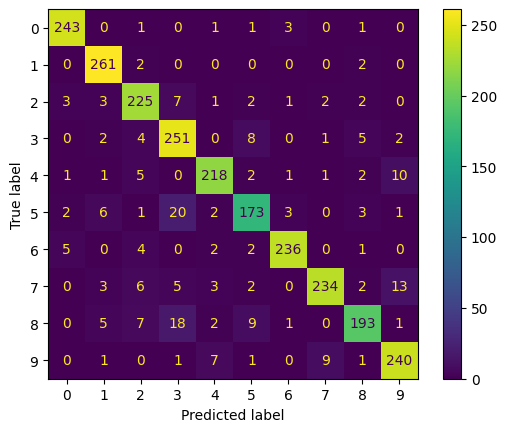

In [76]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_scaled_train, y_train)
y_pred_test = linear_svm.predict(X_scaled_test)
y_pred_train = linear_svm.predict(X_scaled_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

train accuracy:  0.9857333333333334 

 test accuracy: 0.962 



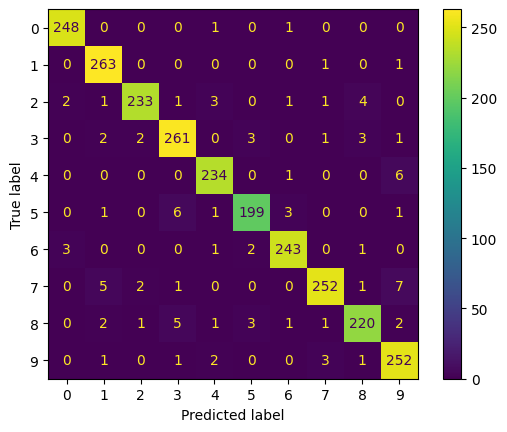

In [77]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
y_pred_test = rbf_svm.predict(X_test)
y_pred_train = rbf_svm.predict(X_train)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [25]:
cov_matrix = X_scaled_train.cov()
eigen_vals, eigen_vecs =np.linalg.eigh(cov_matrix)
np.sum(eigen_vals)

667.0889451926923

In [26]:
explained_variance=[]

for i in sorted(eigen_vals,reverse=True):
  variance = (i / np.sum(eigen_vals))
  explained_variance.append(variance)

cumulative_variance_ratio = np.cumsum(explained_variance)*100
print(cumulative_variance_ratio)

[  6.1099708   10.45342355  14.54159553  17.6103441   20.30584657
  22.65535265  24.70979581  26.65199309  28.33959334  29.85866376
  31.3133135   32.64606205  33.86472952  35.06567586  36.2044211
  37.29273283  38.32638596  39.33780547  40.3175503   41.28181655
  42.19626402  43.0549764   43.88781117  44.71400116  45.51404511
  46.28788536  47.03448916  47.75748417  48.46401031  49.15363072
  49.83765548  50.50268061  51.15463277  51.78129682  52.40463763
  53.01302899  53.60728418  54.19040823  54.75851259  55.31805018
  55.85713495  56.39302731  56.90402292  57.40643431  57.90614366
  58.39972928  58.88782964  59.36451576  59.83222489  60.29213966
  60.75068168  61.20454294  61.65002572  62.08731167  62.51772503
  62.9348616   63.34159559  63.74817593  64.15097698  64.54769186
  64.93637547  65.32198054  65.70335214  66.07276261  66.43880443
  66.79853821  67.15470964  67.50523812  67.85462744  68.19290933
  68.52929892  68.85910403  69.1840349   69.50484517  69.81981605
  70.129755

In [27]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)

len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 91])

202

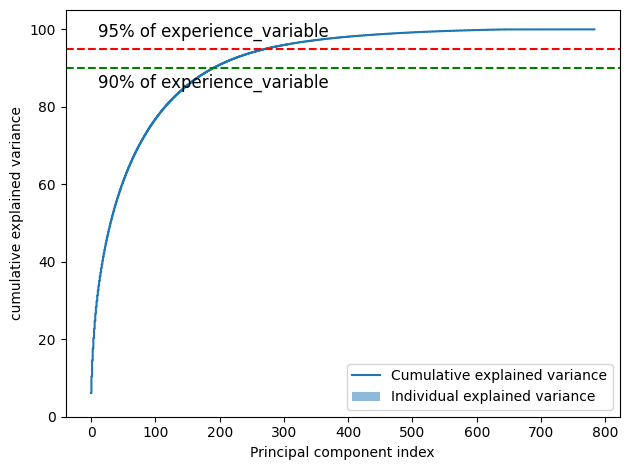

In [28]:
plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='red',linestyle='--')
plt.axhline(y=90,c='green',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.annotate('90% of experience_variable',
            xy=(10, 85),fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='rbf', n_components=784)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [30]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)*100
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio*100
display(kpca_df)

,cumulative explained variance,explained_variance_ratio
0,10.010179,10.010179
1,14.274098,4.263919
2,18.031954,3.757856
3,21.286833,3.254878
4,23.920424,2.633592
...,...,...
779,99.910117,0.022519
780,99.932621,0.022504
781,99.955104,0.022483
782,99.977569,0.022465


In [33]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)
len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 95])

579

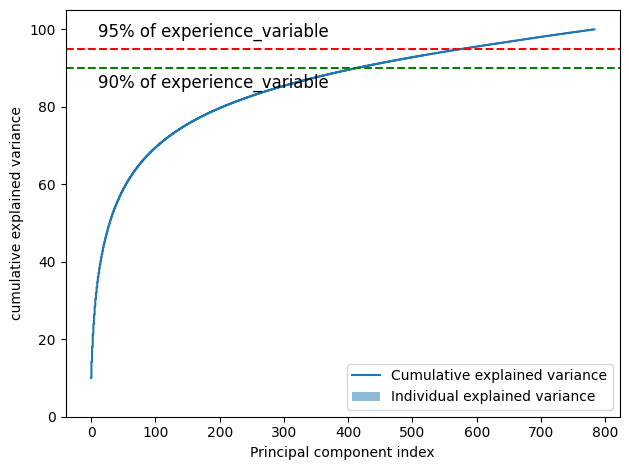

In [34]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='red',linestyle='--')
plt.axhline(y=90,c='green',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.annotate('90% of experience_variable',
            xy=(10, 85),fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 579 ,kernel= "rbf",n_jobs=-1,fit_inverse_transform=True)
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)


In [61]:
X_train_kpca.shape

(7500, 579)

In [62]:
X_scaled_test.shape

(2500, 784)

In [64]:
X_train_reduced = Kernel_pca.inverse_transform(X_train_kpca)
X_train_unscaled = scaler.inverse_transform(X_scaled_train)

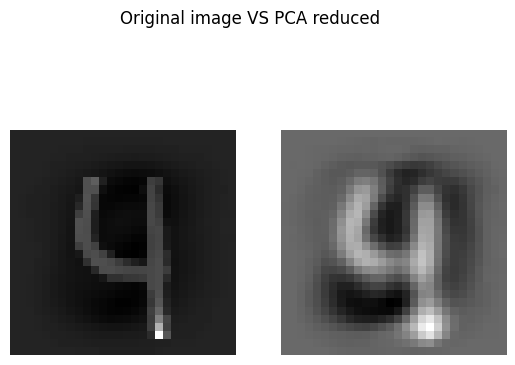

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.matshow(X_train_unscaled[1].reshape(28,28), cmap='gray')
ax2.matshow(X_train_reduced[1].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[1]))
plt.show()

train accuracy:  0.9484 

test accuracy: 0.9232 



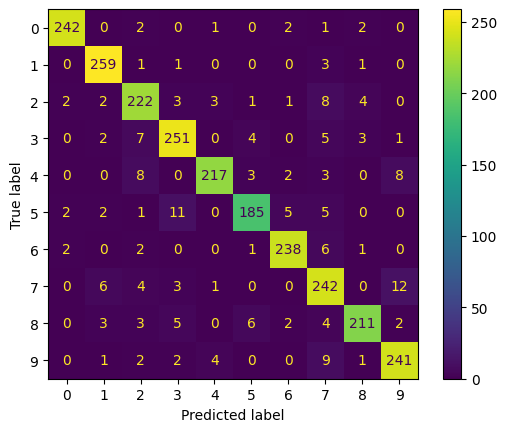

In [72]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

train accuracy:  0.9797333333333333 

 test accuracy: 0.9364 



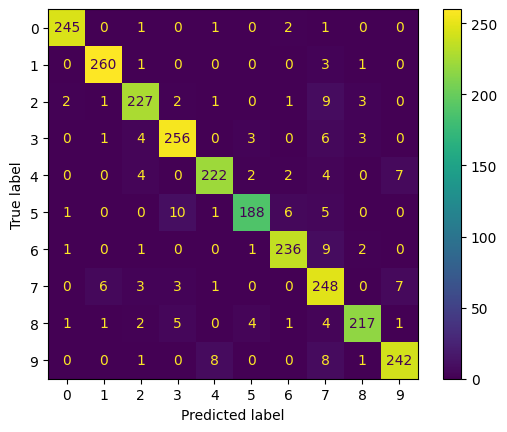

In [75]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## KPCA+LDA with RBF Kernel

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.95:
        break
        
# Return the number of components
print(n_components)

8


In [79]:
lda = LDA(n_components=8)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda=lda.transform(X_test_kpca)

Train accuracy: 0.958 

Test accuracy: 0.932 



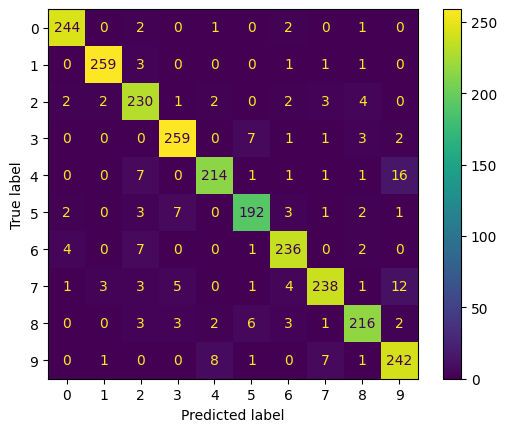

In [80]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.9548 

Test accuracy: 0.93 



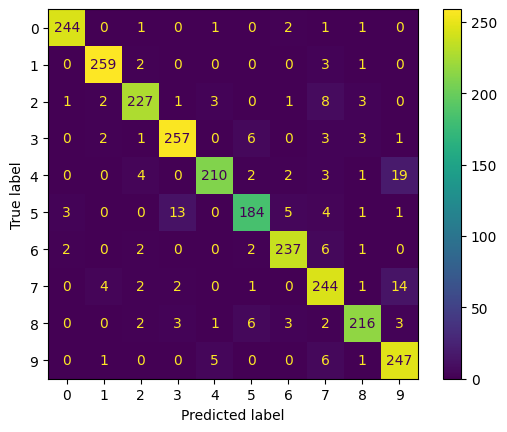

In [81]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## KPCA with Sigmoid Kernel

In [90]:
from sklearn.decomposition import KernelPCA
import seaborn as sns
kpca = KernelPCA(kernel='sigmoid', n_components=784)
kpca=kpca.fit_transform(X_scaled_train)
explained_variance=np.var(kpca, axis=0 )

In [91]:
explained_variance_ratio=explained_variance/ np.sum(explained_variance)
cumulative_variance_ratio=np.cumsum(explained_variance_ratio)*100
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cumulative_variance_ratio
kpca_df['explained_variance_ratio']= explained_variance_ratio*100
display(kpca_df)

,cumulative explained variance,explained_variance_ratio
0,8.800310,8.800310
1,15.019349,6.219040
2,20.951083,5.931733
3,25.401624,4.450541
4,29.183188,3.781565
...,...,...
779,99.997237,0.000700
780,99.997936,0.000699
781,99.998629,0.000693
782,99.999315,0.000687


In [92]:
cumulative_variance_ratio_df = pd.DataFrame(cumulative_variance_ratio)

len(cumulative_variance_ratio_df.loc[cumulative_variance_ratio_df[0] <= 95])

216

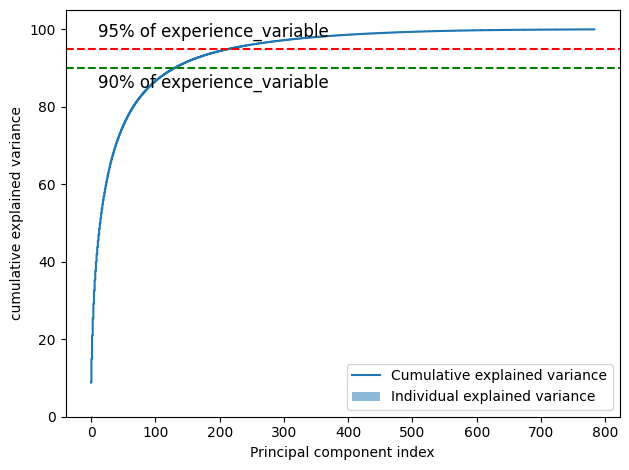

In [93]:
plt.bar(range(0,len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.axhline(y=95,c='red',linestyle='--')
plt.axhline(y=90,c='green',linestyle='--')
plt.ylabel('cumulative explained variance')
plt.annotate('95% of experience_variable',
            xy=(10, 98),fontsize=12)
plt.annotate('90% of experience_variable',
            xy=(10, 85),fontsize=12)
plt.tight_layout()
plt.show()

In [94]:
from sklearn.decomposition import KernelPCA
Kernel_pca = KernelPCA(n_components = 216 ,kernel= "sigmoid",n_jobs=-1,fit_inverse_transform=True)# extracts 2 features, specify the kernel as rbf
X_train_kpca = Kernel_pca.fit_transform(X_scaled_train)
X_test_kpca= Kernel_pca.transform(X_scaled_test)

X_train_kpca=pd.DataFrame(X_train_kpca)
X_test_kpca=pd.DataFrame(X_test_kpca)

In [95]:
X_train_reduced = Kernel_pca.inverse_transform(X_train_kpca)
X_train_unscaled = scaler.inverse_transform(X_scaled_train)

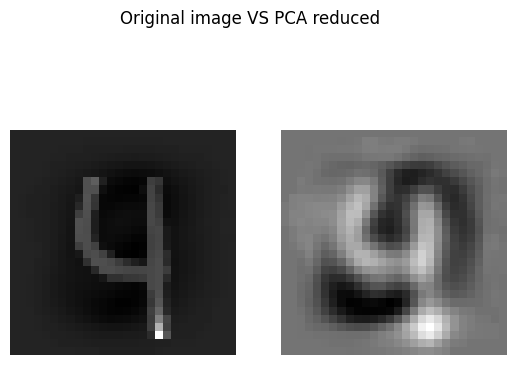

In [96]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.matshow(X_train_unscaled[1].reshape(28,28), cmap='gray')
ax2.matshow(X_train_reduced[1].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[1]))
plt.show()

train accuracy:  0.9265333333333333 

test accuracy: 0.914 



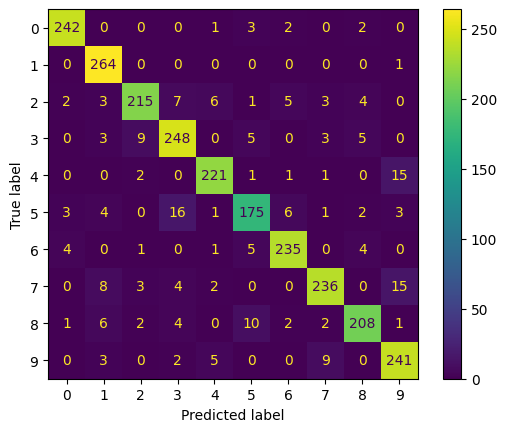

In [97]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca, y_train)
y_pred_test = linear_svm.predict(X_test_kpca)
y_pred_train = linear_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print("test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

train accuracy:  0.9917333333333334 

 test accuracy: 0.96 



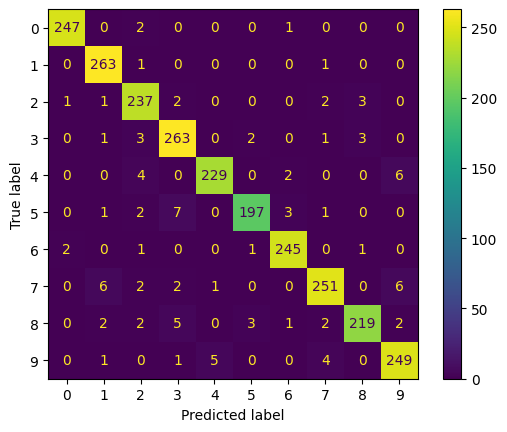

In [98]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca)
y_pred_train = rbf_svm.predict(X_train_kpca)
print("train accuracy: ",metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train),"\n")
print(" test accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

## KPCA+LDA with Sigmoid Kernel

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
# Set initial variance explained so far
total_variance = 0.0
# Set initial number of features
n_components = 0
# For the explained variance of each feature:
for explained_variance in lda.explained_variance_ratio_:
    # Add the explained variance to the total
    total_variance += explained_variance
    # Add one to the number of components
    n_components += 1
    
    # If we reach our goal level of explained variance
    if total_variance >= 0.95:
        break
        
# Return the number of components
print(n_components)

8


In [100]:
lda = LDA(n_components=8)
X_train_kpca_lda = lda.fit_transform(X_train_kpca, y_train)
X_test_kpca_lda=lda.transform(X_test_kpca)

Train accuracy: 0.8932 

Test accuracy: 0.8696 



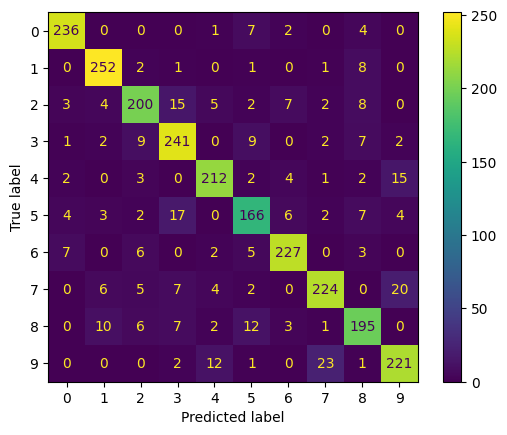

In [101]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = linear_svm.predict(X_test_kpca_lda)
y_pred_train = linear_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

Train accuracy: 0.9146666666666666 

Test accuracy: 0.89 



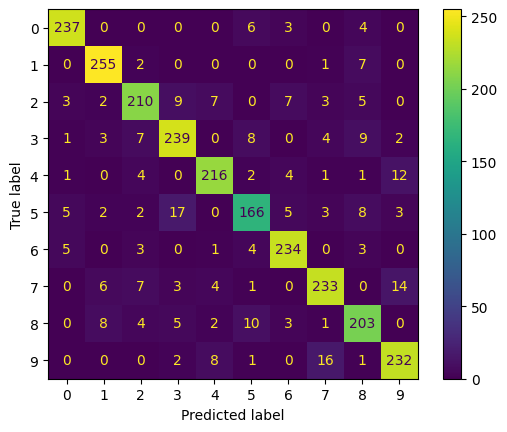

In [102]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_kpca_lda, y_train)
y_pred_test = rbf_svm.predict(X_test_kpca_lda)
y_pred_train = rbf_svm.predict(X_train_kpca_lda)
print("Train accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), "\n")
print("Test accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), "\n")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()